**Some checks to better understnad RGI04 extreme committed ice loss**

In [1]:
import xarray as xr
import numpy as np
from oggm import utils
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import progressbar
from scipy import stats
import seaborn as sns
path_orog = '/home/www/lschuster/isimip3b/'
frgi = path_orog + 'rgi62_stats.h5'
odf = pd.read_hdf(frgi, index_col=0)
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [2]:
rgis_ice_cap_04 = odf.loc[odf.O1Region == '04'][odf.loc[odf.O1Region == '04'].GlacierType == 'Ice cap'].index

In [3]:
import oggm
df_itmix = pd.read_hdf(oggm.utils.get_demo_file('rgi62_itmix_df.h5'))

vol_ratio_icecap_04 = df_itmix.loc[rgis_ice_cap_04]['vol_itmix_m3'].sum()/df_itmix.loc[odf.loc[odf.O1Region == '04'].index]['vol_itmix_m3'].sum()
vol_ratio_icecap_04

0.5312750779229376

In [4]:
odf.loc[['RGI60-04.06187','RGI60-04.06188']]['Area'].sum()/odf.loc[odf.O1Region == '04'].Area.sum()

0.0934928018890914

In [5]:
vol_ratio_barnes_icecap = df_itmix.loc[['RGI60-04.06187','RGI60-04.06188']]['vol_itmix_m3'].sum()/df_itmix.loc[odf.loc[odf.O1Region == '04'].index]['vol_itmix_m3'].sum()

In [6]:
vol_ratio_barnes_icecap

0.17797622642795644

In [13]:
for n in odf.index:
    if 'Barnes' in str(odf.loc[n]['Name']):
        print(odf.loc[n]['Name'], n)
    if 'Penny' in str(odf.loc[n]['Name']):
        print(odf.loc[n]['Name'], n)

Barnes Ice Cap South Dome N Slope RGI60-04.06187
Barnes Ice Cap Loeken 2 RGI60-04.06188


In [14]:
DATE = 'Feb12_2024' #'apr04' (has OGGM runaway effect of glaciers inside)
fill_option = 'repeat_last_101yrs' #'repeat_last_20yrs'
fit_to_median = False
path_merged_runs_scaled_extend = f'../data/GMIP3_reg_glacier_model_data/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'

ds_reg_models = xr.open_dataset(path_merged_runs_scaled_extend)
# --> comes from isimip3b_postprocessing_analysis/isimip3b_postprocess_to_monthly.ipynb
pd_global_temp_exp = pd.read_csv('../data/climate_input_data/temp_ch_ipcc_ar6_isimip3b.csv', index_col = 0)

In [15]:
ds_reg_models_sel = ds_reg_models.sel(period_scenario = ['1851-1870_hist', '1901-1920_hist', '1951-1970_hist', '1995-2014_hist'])

In [17]:
# Define experiments 
gcms = ['gfdl-esm4', 'ipsl-cm6a-lr', 'mpi-esm1-2-hr', 'mri-esm2-0', 'ukesm1-0-ll' ]
scenarios = ['hist', 'ssp126', 'ssp370', 'ssp585']

Text(0.5, 1.0, 'All experiments (5 GCMs*4 time periods)')

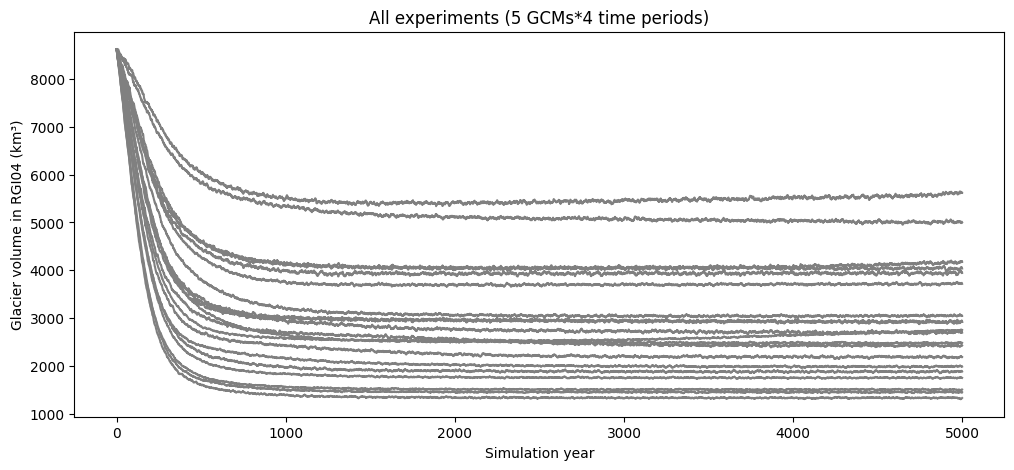

In [18]:
for gcm in gcms:
    plt.plot(ds_reg_models_sel.sel(model_author='OGGM_v16').sel(rgi_reg='04').sel(gcm=gcm).volume_m3/1e9, color='grey')
plt.ylabel('Glacier volume in RGI04 (km³)')
plt.xlabel('Simulation year')
plt.title('All experiments (5 GCMs*4 time periods)')

['gfdl-esm4', 'ipsl-cm6a-lr', 'mpi-esm1-2-hr', 'mri-esm2-0', 'ukesm1-0-ll']
['1851-1870', '1901-1920', '1951-1970', '1995-2014']


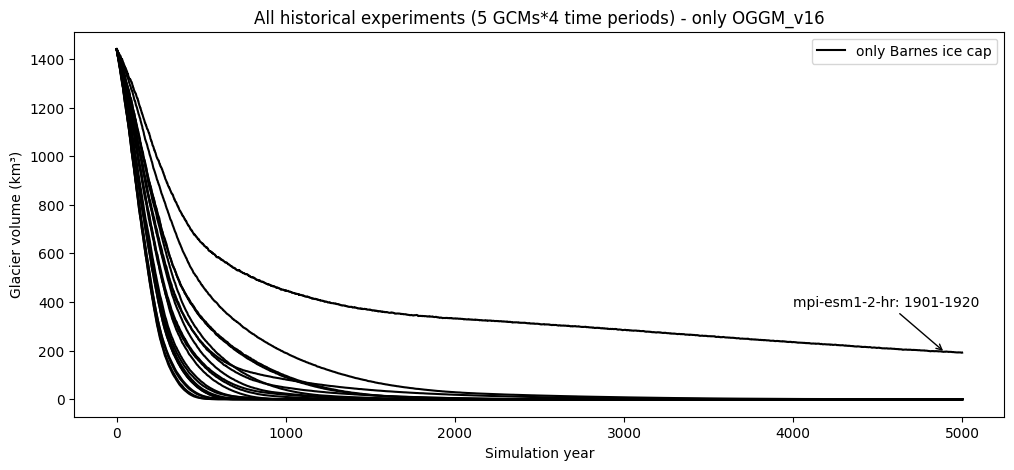

In [19]:

#y0_times = [1851, 1901, 1951, 1995, 2021, 2041, 2061, 2081]
period_l = []
for gcm in gcms:
    for y0_time in [1851,1901, 1951, 1995]:
        period = f'{y0_time}-{y0_time+19}'
        ds = xr.open_dataset(f'/home/www/lschuster/runs_glacierMIP3_oggm_v16/output/RGI04/{gcm}_historical_{period}.nc')
        ds_sel = ds.volume.sel(rgi_id = ['RGI60-04.06187','RGI60-04.06188']).sum(dim='rgi_id')/1e9
        plt.plot(ds_sel, color='black', 
                 label='only Barnes ice cap')
        if ds_sel.isel(time=-1) > 10:
            #print(gcm, y0_time)
            plt.annotate(f'{gcm}: {period}', xy=(4900,ds_sel.isel(time=-1)), 
                         xytext = (4000,ds_sel.isel(time=-1)*2),
                         arrowprops={'arrowstyle':'->'})
        #plt.plot(ds.volume.sel(rgi_id = rgis_ice_cap_04).sum(dim='rgi_id'), color='blue', label='only RGI04 ice caps')
        #plt.plot(ds.volume.sum(dim='rgi_id'), color='grey', label='all RGI04 glaciers')
        if gcm == gcms[0] and y0_time == 1851:
            plt.legend()
        period_l.append(period)
            
plt.ylabel('Glacier volume (km³)')
plt.xlabel('Simulation year')
plt.title('All historical experiments (5 GCMs*4 time periods) - only OGGM_v16');
print(gcms)
print(period_l[:4]) 